<a href="https://colab.research.google.com/github/nayanjha16/Housing_price_prediction/blob/main/House_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The purpose of this notebook is to perform the housing price analysis on the sample dataset provided using a variety of regression models

In [1]:
#import statements
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# XGBoost
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_squared_error, accuracy_score


In [2]:
#defiing the path of the csv file
path="/content/drive/MyDrive/house_price_prediction_assignment/data/sample_dataset.csv"

In [3]:
#reading the csv file
housing_price_prediction_dataset=pd.read_csv(path)

In [4]:
print(housing_price_prediction_dataset.columns)

Index(['ID', 'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF',
       'FullBath', 'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


In [5]:
print(len(housing_price_prediction_dataset.columns))

10


In [6]:
housing_price_prediction_dataset.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [7]:
#Gaining a general understaindingof the dataset
housing_price_prediction_dataset.info()
#Note: since the description states the values are not null so no explicit checks have been placed for it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1000 non-null   int64
 1   OverallQual  1000 non-null   int64
 2   GrLivArea    1000 non-null   int64
 3   YearBuilt    1000 non-null   int64
 4   TotalBsmtSF  1000 non-null   int64
 5   FullBath     1000 non-null   int64
 6   HalfBath     1000 non-null   int64
 7   GarageCars   1000 non-null   int64
 8   GarageArea   1000 non-null   int64
 9   SalePrice    1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [8]:
# Check for duplicates
# Check for duplicate rows
duplicate_rows = housing_price_prediction_dataset[housing_price_prediction_dataset.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
    #write the code here to remove the duplicate entries from the dataframe
    #now dropping one of the duplicate entries from the dataframe
    housing_price_prediction_dataset=housing_price_prediction_dataset.drop_duplicates()
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [9]:
#gaining some basic statistics about the dataset provided
housing_price_prediction_dataset.describe()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,288.819436,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.000000,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,250.750000,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,500.500000,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,750.250000,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,1000.000000,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


Upon initial obervataion it is found that the following columns are categorical and numerical in nature respectively

##Categorical columns: <br>
1) OverallQual <br>
2) YearBuilt  <br>
3) GarageCars <br>
4) FullBath  <br>
5) HalfBath  <br>

##Numerical columns: <br>
1) GrLivArea <br>
2) TotalBsmtSF <br>
3) GarageArea <br>
4) SalePrice  (Dependent Variable) <br>

Note: The column ID is just an Index and doesn't contribute to the SalePrice in any way so we are not going to consider this column at all for our analysis.

Note: Since All the categorical values are already present in numerical form so I haven't done that explicitly in the code.

In [10]:
#checking for 'na' values
housing_price_prediction_dataset.isna().sum()

ID             0
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

#It is observed that all the entries are present across all the columns

In [11]:
#Since all the entries are present in each column so we can proceed ahead with data cleaning

#1) Drop the ID column as that is not required for analysis
housing_price_prediction_dataset=housing_price_prediction_dataset.drop('ID',axis='columns')

##Data Visualization

Text(0.5, 1.0, 'Histogram for sales price')

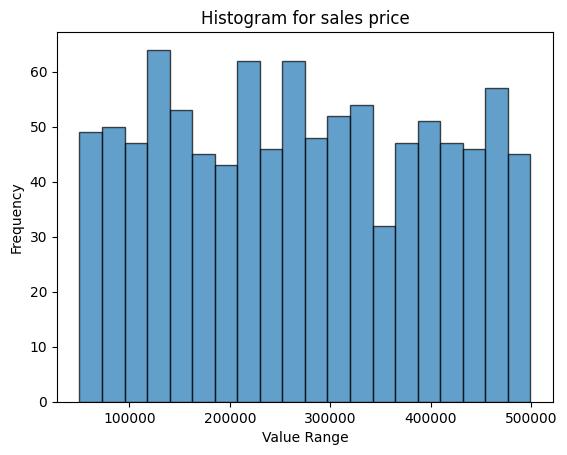

In [12]:
#Understanding the distribution of Sales Price
num_bins = 20
data_range = (min(housing_price_prediction_dataset.SalePrice), max(housing_price_prediction_dataset.SalePrice))

# Create the histogram
plt.hist(housing_price_prediction_dataset.SalePrice, bins=num_bins, range=data_range, edgecolor='k', alpha=0.7) #what is this alpha parameter?

# Customize the plot
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram for sales price')


#now to understand the independent variables better , creating a histograms and countplots for them too
#Histograms are constructed for continious variables
#Countplots are constructed for categorical variables


Text(0.5, 1.0, 'Histogram for OverallQual')

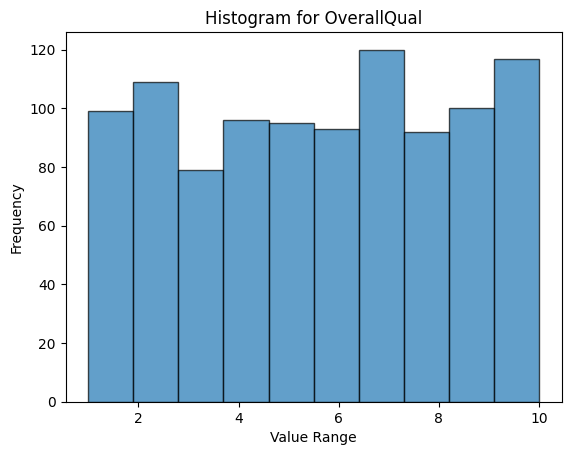

In [13]:
num_bins = 10 # as we have a total of 10 quality ratings
data_range = (min(housing_price_prediction_dataset.OverallQual), max(housing_price_prediction_dataset.OverallQual))

# Create the histogram
plt.hist(housing_price_prediction_dataset.OverallQual, bins=num_bins, range=data_range, edgecolor='k', alpha=0.7) #what is this alpha parameter?

# Customize the plot
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram for OverallQual')


Text(0.5, 1.0, 'Histogram for GrLivArea')

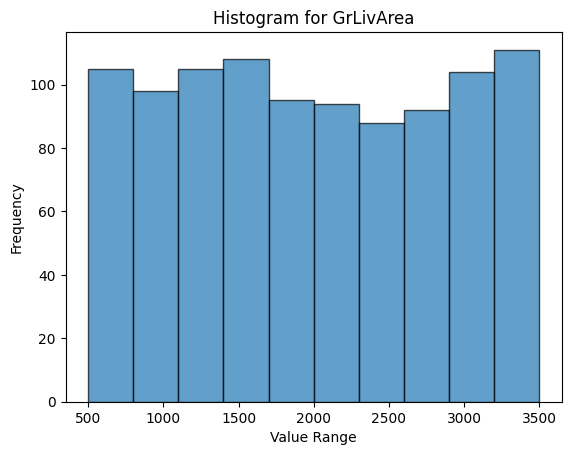

In [14]:
num_bins = 10 # as we have a total of 10 quality ratings
data_range = (min(housing_price_prediction_dataset.GrLivArea), max(housing_price_prediction_dataset.GrLivArea))

# Create the histogram
plt.hist(housing_price_prediction_dataset.GrLivArea, bins=num_bins, range=data_range, edgecolor='k', alpha=0.7) #what is this alpha parameter?

# Customize the plot
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram for GrLivArea')


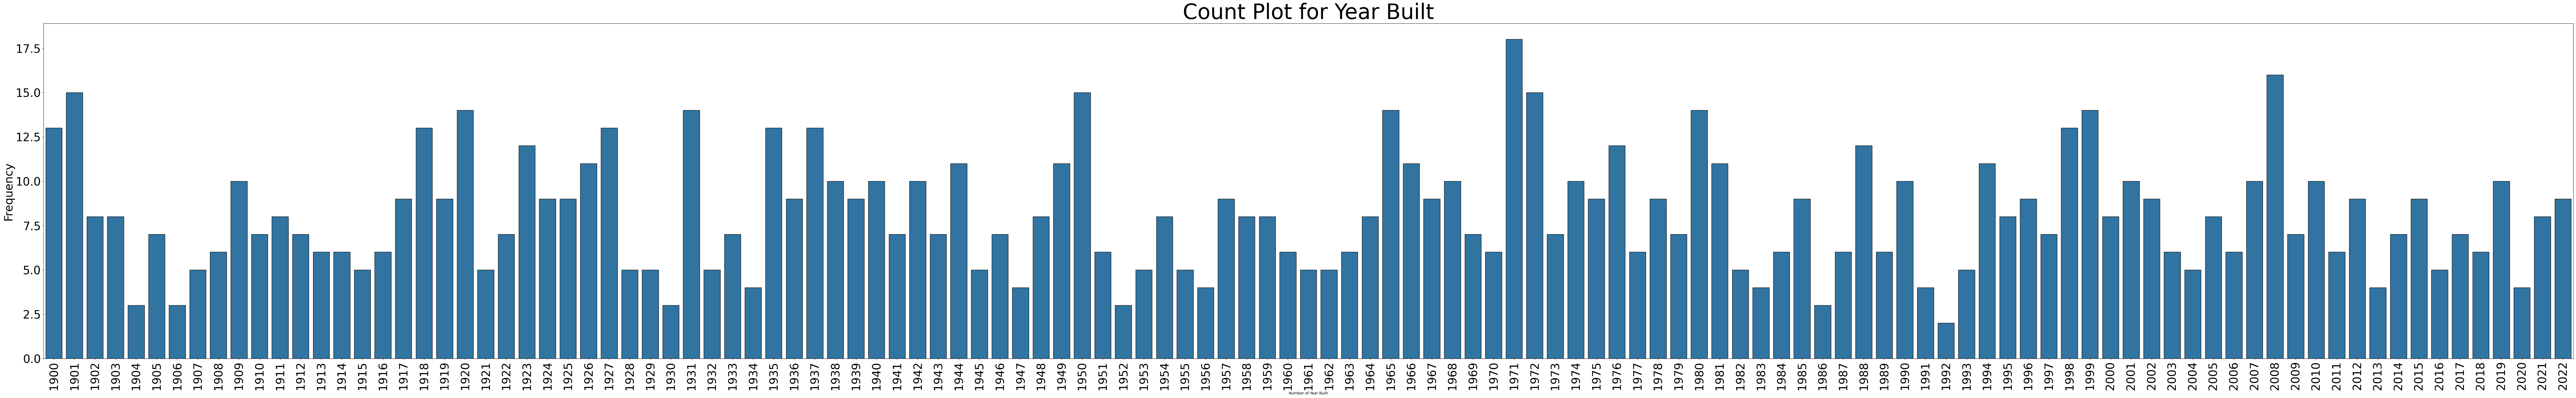

In [15]:
plt.figure(figsize=(120, 16))
sns.countplot(x='YearBuilt', data=housing_price_prediction_dataset, edgecolor='k')

plt.xlabel('Number of Year Built')
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('Count Plot for Year Built', fontsize=56)
plt.show()



Text(0.5, 1.0, 'Histogram for TotalBsmtSF')

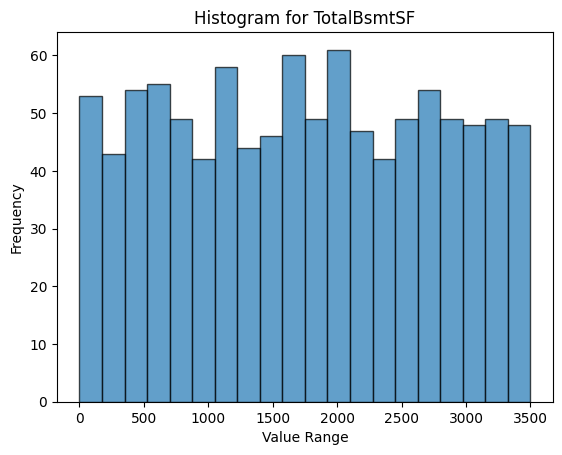

In [16]:
num_bins = 20
data_range = (min(housing_price_prediction_dataset.TotalBsmtSF), max(housing_price_prediction_dataset.TotalBsmtSF))

# Create the histogram
plt.hist(housing_price_prediction_dataset.TotalBsmtSF, bins=num_bins, range=data_range, edgecolor='k', alpha=0.7) #what is this alpha parameter?

# Customize the plot
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram for TotalBsmtSF')


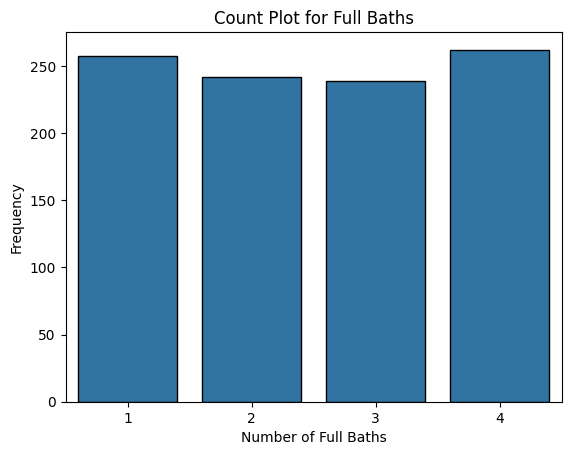

In [17]:
sns.countplot(x='FullBath', data=housing_price_prediction_dataset, edgecolor='k')

plt.xlabel('Number of Full Baths')
plt.ylabel('Frequency')
plt.title('Count Plot for Full Baths')
plt.show()



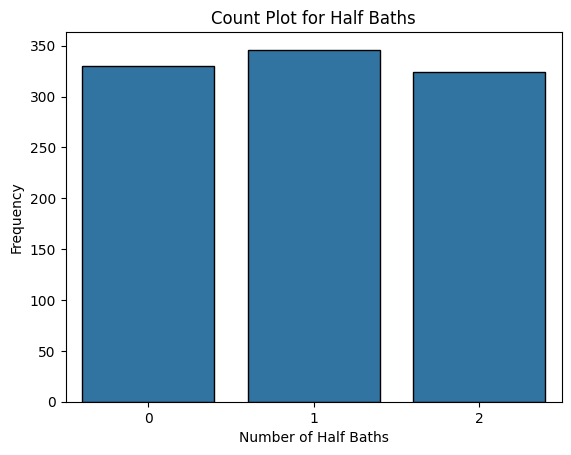

In [18]:
sns.countplot(x='HalfBath', data=housing_price_prediction_dataset, edgecolor='k')

plt.xlabel('Number of Half Baths')
plt.ylabel('Frequency')
plt.title('Count Plot for Half Baths')
plt.show()



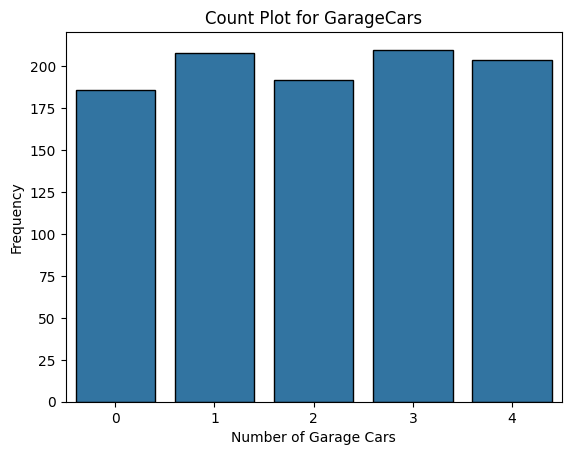

In [19]:
sns.countplot(x='GarageCars', data=housing_price_prediction_dataset, edgecolor='k')

plt.xlabel('Number of Garage Cars')
plt.ylabel('Frequency')
plt.title('Count Plot for GarageCars')
plt.show()


Text(0.5, 1.0, 'Histogram for GarageArea')

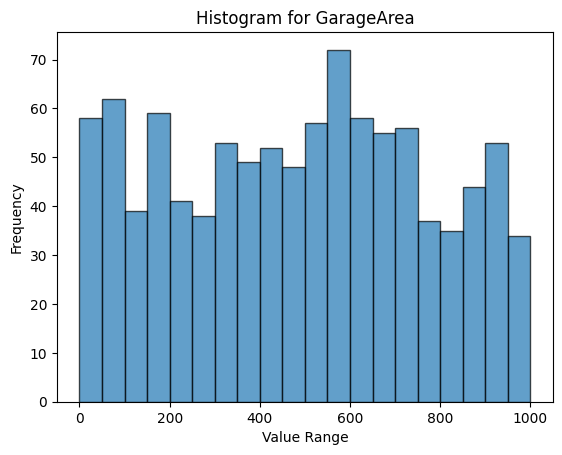

In [20]:
num_bins = 20 # as we have a total of 10 quality ratings
data_range = (min(housing_price_prediction_dataset.GarageArea), max(housing_price_prediction_dataset.GarageArea))

# Create the histogram
plt.hist(housing_price_prediction_dataset.GarageArea, bins=num_bins, range=data_range, edgecolor='k', alpha=0.7) #what is this alpha parameter?

# Customize the plot
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram for GarageArea')


#Understanding the pattern of dependent variable with the individual Independent variable

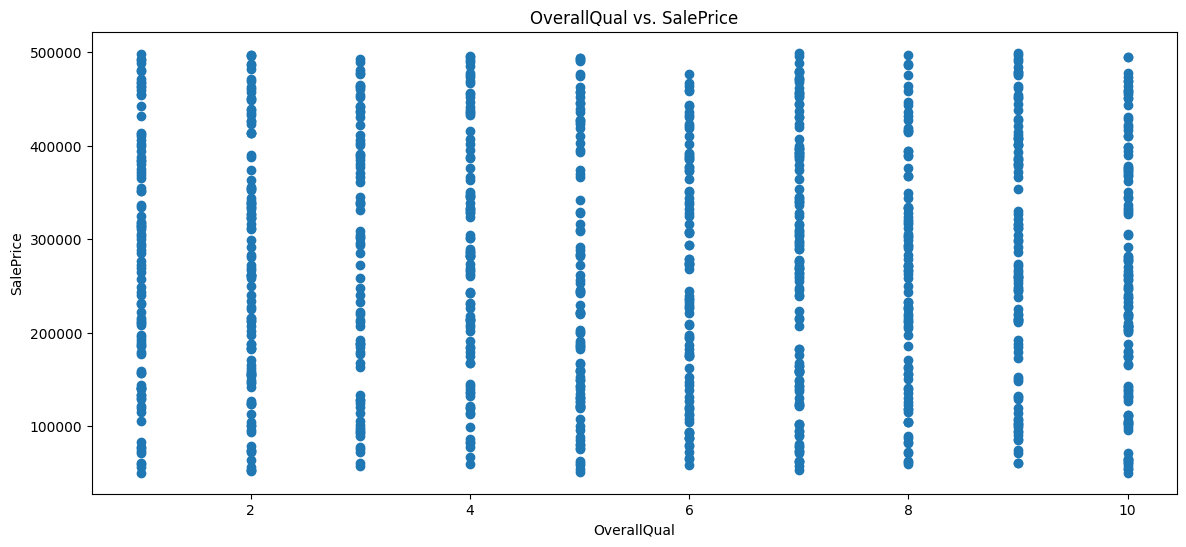

In [21]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.OverallQual, housing_price_prediction_dataset.SalePrice)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("OverallQual vs. SalePrice")
plt.show()


Note : It is observed that sale price is not always directly prioportional to the overall Quality.

In [22]:
housing_price_prediction_dataset.SalePrice.dtype

dtype('int64')

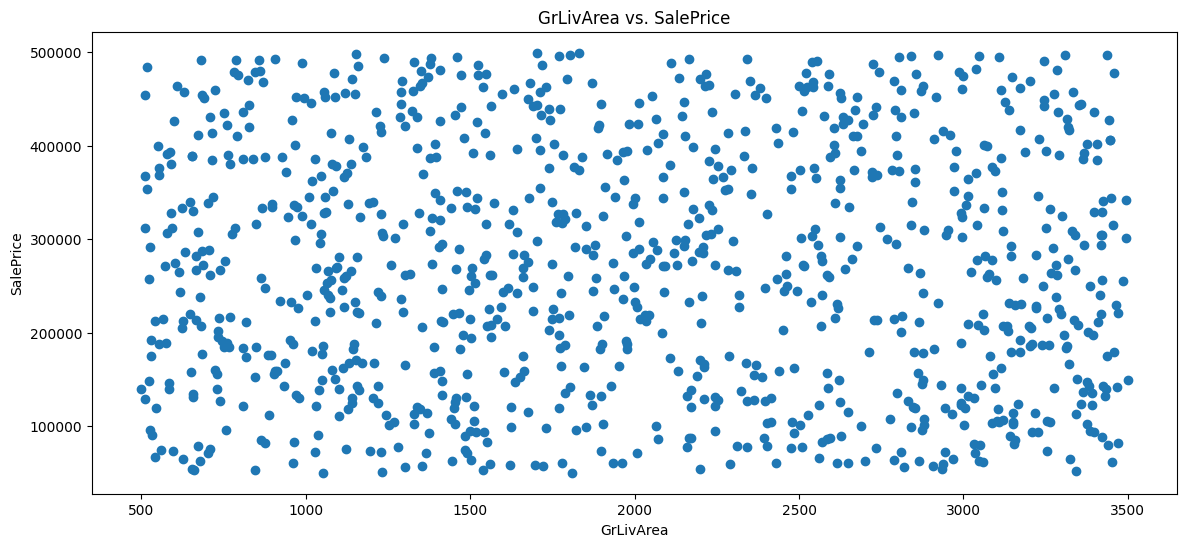

In [23]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.GrLivArea, housing_price_prediction_dataset.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs. SalePrice")
plt.show()


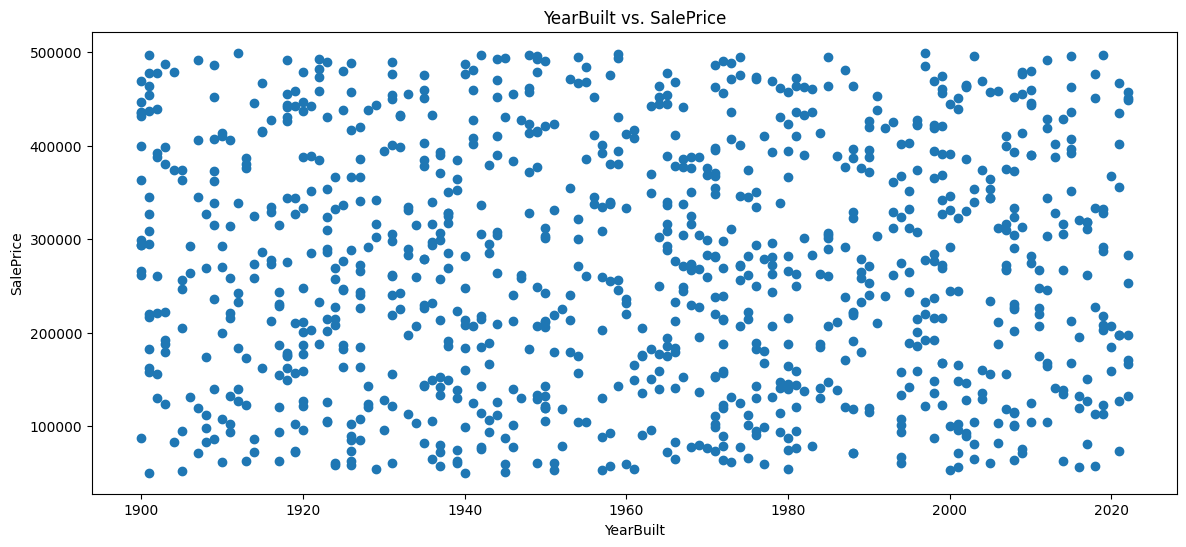

In [24]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.YearBuilt, housing_price_prediction_dataset.SalePrice)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("YearBuilt vs. SalePrice")
plt.show()


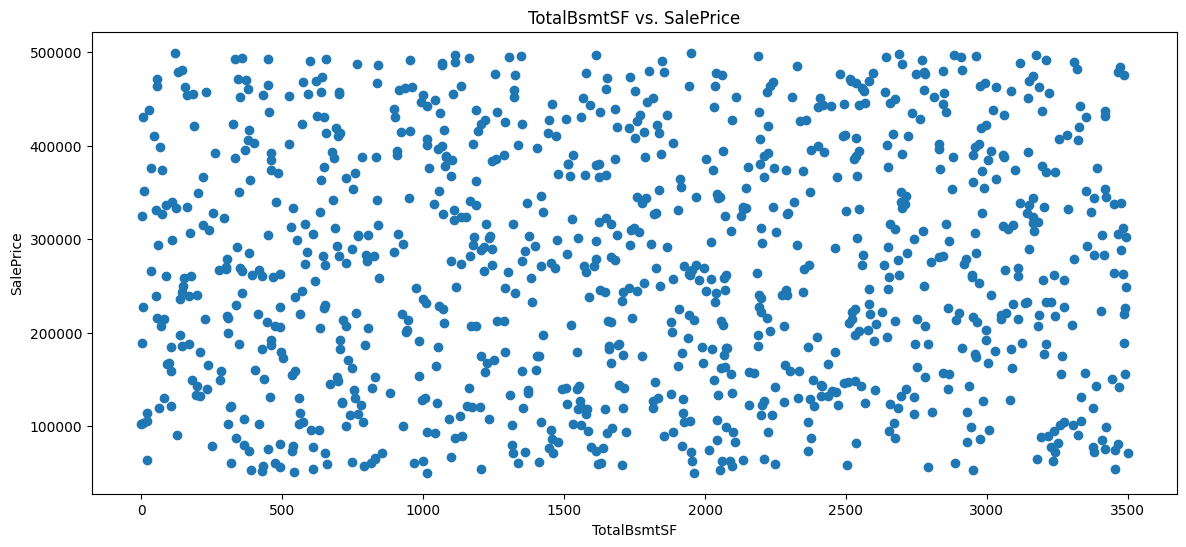

In [25]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.TotalBsmtSF, housing_price_prediction_dataset.SalePrice)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.title("TotalBsmtSF vs. SalePrice")
plt.show()


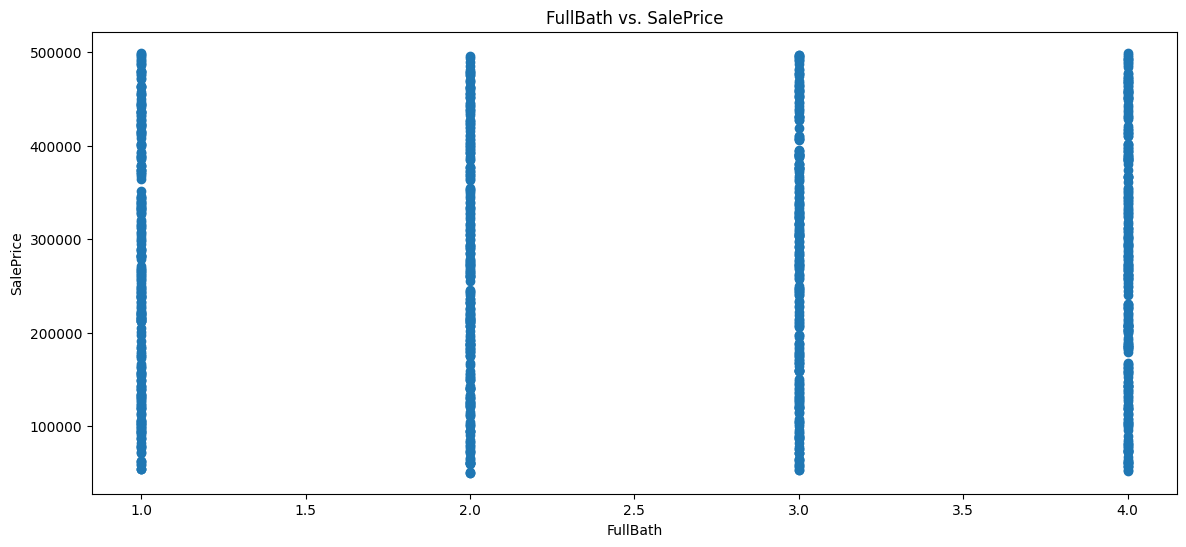

In [26]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.FullBath, housing_price_prediction_dataset.SalePrice)
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.title("FullBath vs. SalePrice")
plt.show()


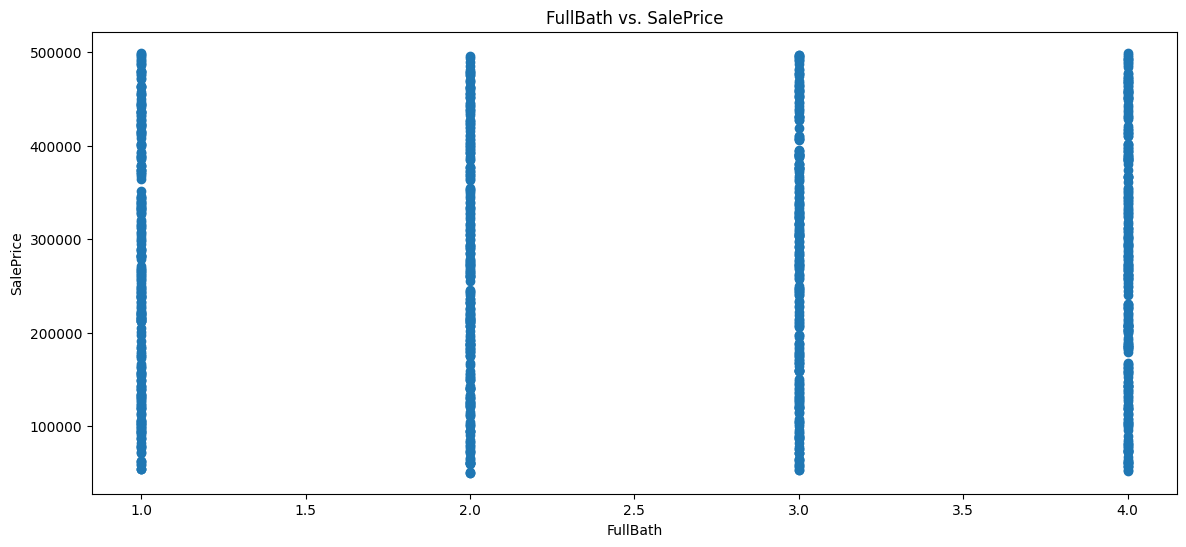

In [27]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.FullBath, housing_price_prediction_dataset.SalePrice)
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.title("FullBath vs. SalePrice")
plt.show()


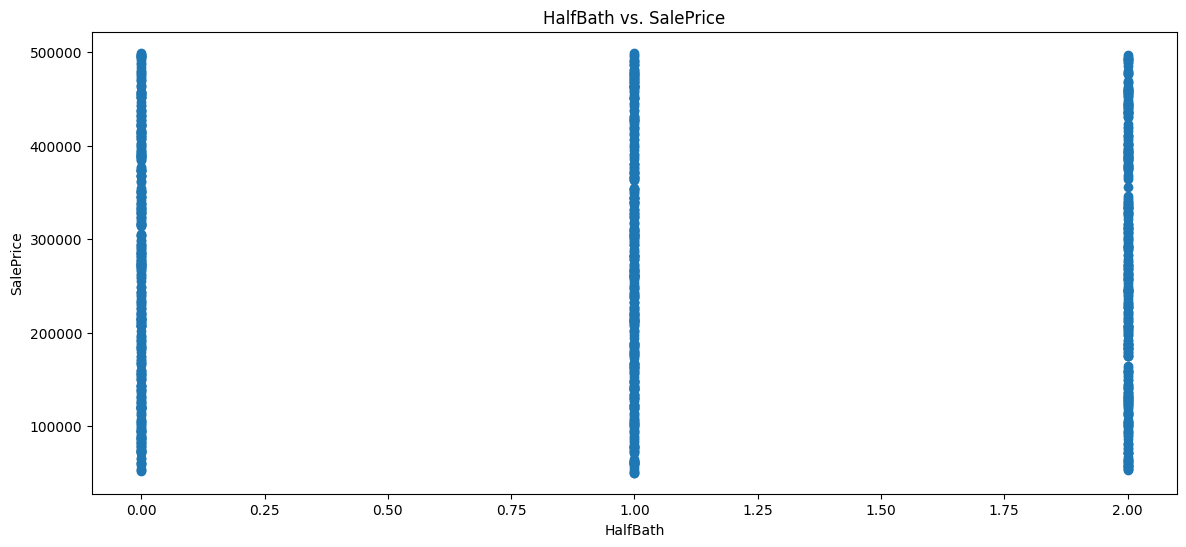

In [28]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.HalfBath, housing_price_prediction_dataset.SalePrice)
plt.xlabel("HalfBath")
plt.ylabel("SalePrice")
plt.title("HalfBath vs. SalePrice")
plt.show()


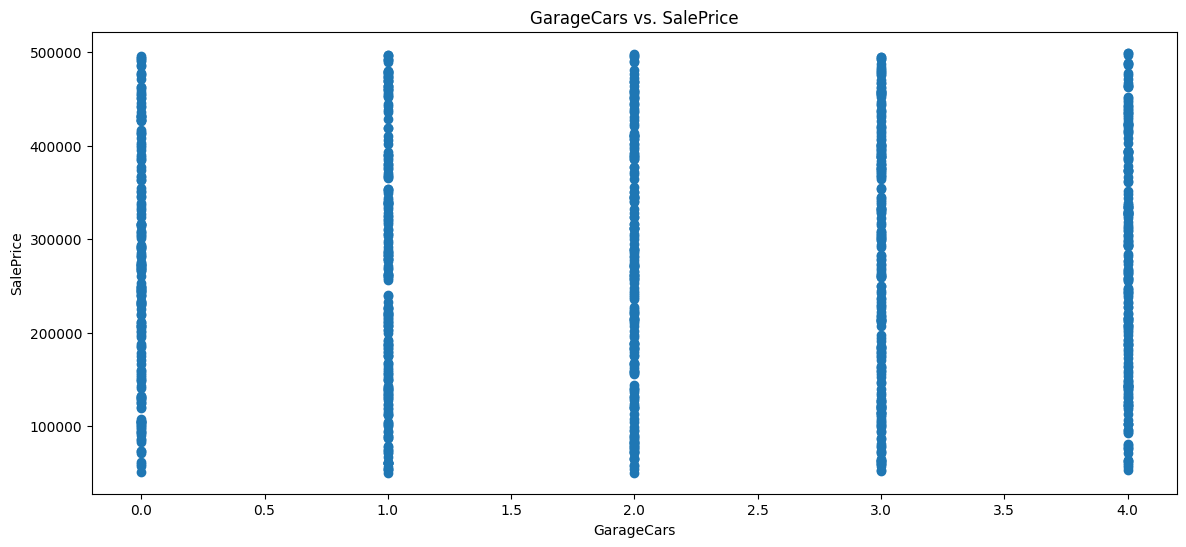

In [29]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.GarageCars, housing_price_prediction_dataset.SalePrice)
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.title("GarageCars vs. SalePrice")
plt.show()


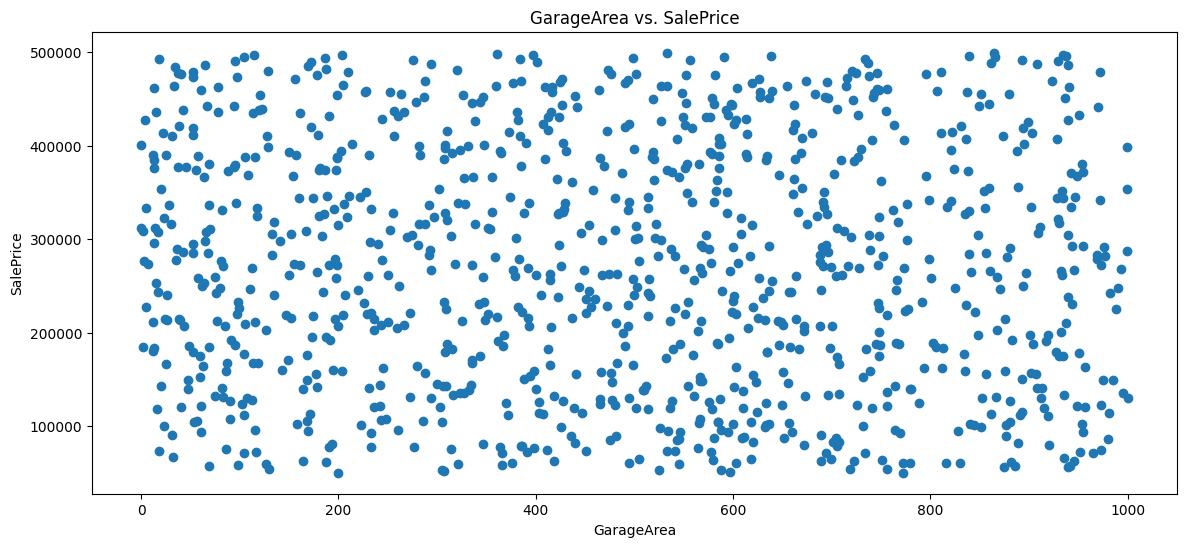

In [30]:
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(housing_price_prediction_dataset.GarageArea, housing_price_prediction_dataset.SalePrice)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.title("GarageArea vs. SalePrice")
plt.show()


The initial observation after looking these plots is that all these independent variables don't show a direct correlation with the sales price of the house.


#creating new features for better understanding of the dataset
1) Total_area= GrLivArea + TotalBsmtSF + GarageArea


In [31]:
housing_price_prediction_dataset["Total_area"] = housing_price_prediction_dataset["GrLivArea"] + housing_price_prediction_dataset["TotalBsmtSF"]+ housing_price_prediction_dataset["GarageArea"]

In [32]:
print(housing_price_prediction_dataset.columns)

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice', 'Total_area'],
      dtype='object')


#Splitting the dataset into the Dependent and Independent variables



In [33]:
training_data = housing_price_prediction_dataset.drop(["SalePrice"],axis=1)
target = housing_price_prediction_dataset["SalePrice"]

#splitting the dataset in a train, test and validation set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=42) # dividing the data into train and test split

#so now the division looks like train data percentage =80 %, test data percentage =20 %

In [35]:
#now printing the lengths of each set
print(" Total entries to train the models are {0}".format(len(X_train)))
print(" Total entries to test the models are {0}".format(len(X_test)))

 Total entries to train the models are 800
 Total entries to test the models are 200


#Data Scaling

##(Using A standard scaler for now but we can use a min-max scaler too)

In [36]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [37]:
#defining a dictionay that stores loss of each regression model
Model_losses_mse={}
Model_losses_r2={}

#Now let us start training the models
#The following models have been explored
1) Linear Regression <br>
2) Polynomial Regression <br>
3) Decision Tree Regressor <br>
4) Random Forest Regressor <br>
5) SVM Regressor <br>
6) Gradient Boosting Regressor <br>
7) XG Boost Regressor <br>
8) Lasso Regression <br>
9) Ridge Regression <br>
10) Elastic Net Regression <br>


Note: The rationale behind choosing these algorithms is to gardually improve the modelling complexity and observe how they behave in accordance with the training data provided.

# Linear Regression

In [38]:
#Performing Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Evaluation:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

Model_losses_mse['Linear_Regression']=linear_mse
Model_losses_r2['Linear_Regression']=linear_r2


Linear Regression Evaluation:
Mean Squared Error: 17230587706.375973
R-squared: -0.026938950798778505


In [39]:
# Cross-validation for Linear Regression
linear_scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
linear_rmse_scores = np.sqrt(-linear_scores)

print("\nCross-Validation for Linear Regression:")
print("MSE scores:", linear_rmse_scores)
print("Mean RMSE:", linear_rmse_scores.mean())
print("Standard Deviation:", linear_rmse_scores.std())


Cross-Validation for Linear Regression:
MSE scores: [130723.11053319 128738.39060523 143603.76107838 124736.30847538
 124054.98378693]
Mean RMSE: 130371.31089581976
Standard Deviation: 7064.5193738723265


# Polynomial Regresssion

In [40]:
# Perform Polynomial Regression
degree = 3  # Adjust the polynomial degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Evaluate Polynomial Regression
y_pred_poly = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Evaluation:")
print("Mean Squared Error:", poly_mse)
print("R-squared:", poly_r2)

Model_losses_mse['Polynomial_Regression']=poly_mse
Model_losses_r2['Polynomial_Regression']=poly_r2


Polynomial Regression Evaluation:
Mean Squared Error: 21302713147.9325
R-squared: -0.2696366637111267


In [41]:

# Cross-validation for Polynomial Regression
poly_scores = cross_val_score(poly_model, X_poly_train, y_train, scoring='neg_mean_squared_error', cv=5)
poly_rmse_scores = np.sqrt(-poly_scores)

print("\nCross-Validation for Polynomial Regression:")
print("RMSE scores:", poly_rmse_scores)
print("Mean RMSE:", poly_rmse_scores.mean())
print("Standard Deviation:", poly_rmse_scores.std())


Cross-Validation for Polynomial Regression:
RMSE scores: [153740.541288   146603.80600493 165858.5333895  162896.31569652
 151380.24569548]
Mean RMSE: 156095.88841488614
Standard Deviation: 7203.327327503441


# Decision Tree Regressor

In [42]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train,y_train)

y_train_pred=decision_tree_model.predict(X_train)
y_pred_decision = decision_tree_model.predict(X_test)

decison_tree_mse = mean_squared_error(y_test, y_pred_decision)
decision_tree_r2 = r2_score(y_test, y_pred_decision)

print("\nDecision Tree Regression Evaluation:")
print("Mean Squared Error:", decison_tree_mse)
print("R-squared:", decision_tree_r2)

Model_losses_mse['Decision_Tree_Regression']=decison_tree_mse
Model_losses_r2['Decision_Tree_Regression']=decision_tree_r2


Decision Tree Regression Evaluation:
Mean Squared Error: 37000713463.595
R-squared: -1.205233768610805


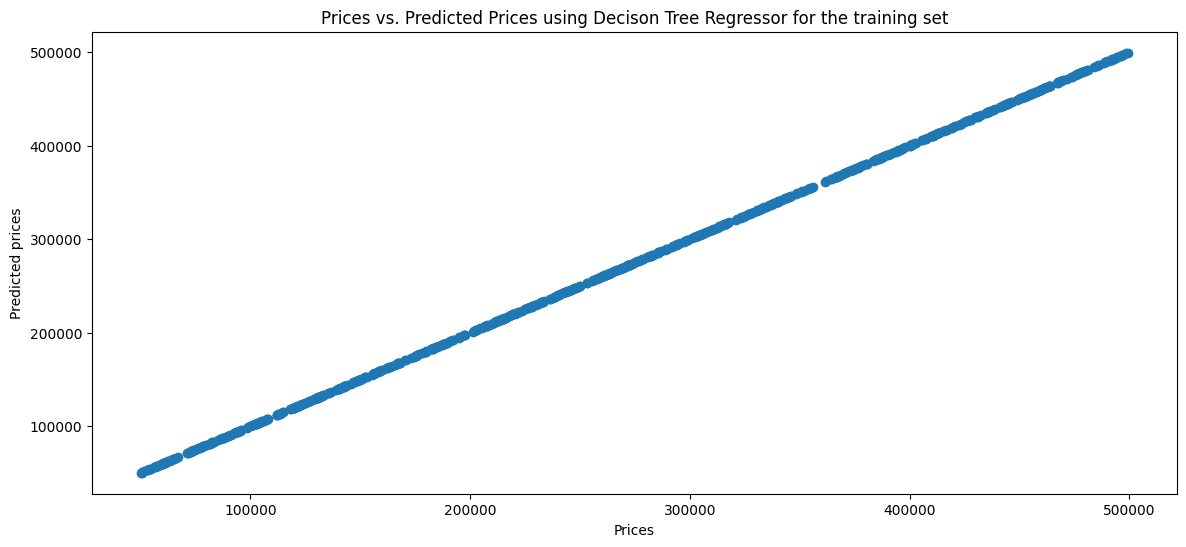

In [43]:
# Prediction Plot for Decisoion Tree Regressor
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Decison Tree Regressor for the training set")
plt.show()

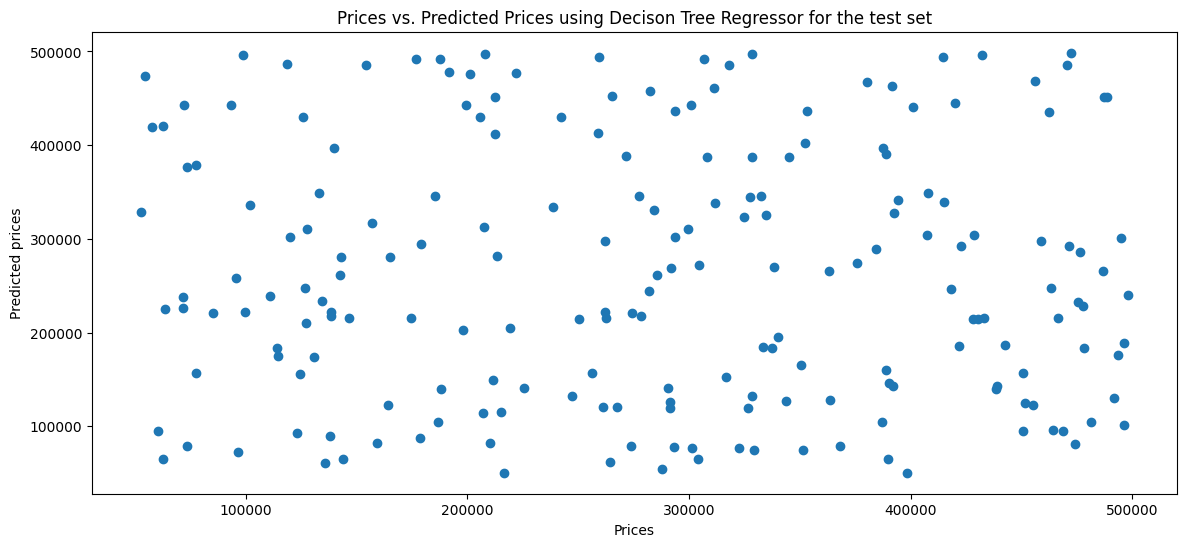

In [44]:
# Prediction Plot for Decisoion Tree Regressor
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_decision)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Decison Tree Regressor for the test set")
plt.show()

In [45]:
# Cross-validation for Decison Tree Regression
Decison_tree_scores = cross_val_score(decision_tree_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Decision_tree_rmse_scores = np.sqrt(-Decison_tree_scores)

print("\nCross-Validation for Decison Tree Regression:")
print("RMSE scores:", Decision_tree_rmse_scores)
print("Mean RMSE:", Decision_tree_rmse_scores.mean())
print("Standard Deviation:", Decision_tree_rmse_scores.std())


Cross-Validation for Decison Tree Regression:
RMSE scores: [168790.22281015 188114.07117008 184439.08343656 182076.67444242
 172883.78075876]
Mean RMSE: 179260.76652359506
Standard Deviation: 7258.423240923954


#Random Forest Regressor

In [46]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)

y_train_pred_random_forest= random_forest_model.predict(X_train)
y_pred_random_forest = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)


print("\nRandom Forest Regression Evaluation:")
print("Mean Squared Error:", random_forest_mse)
print("R-squared:", random_forest_r2)

Model_losses_mse['Random_Forest_Regression']=random_forest_mse
Model_losses_r2['Random Forest_Regression']=random_forest_r2


Random Forest Regression Evaluation:
Mean Squared Error: 17933774035.875965
R-squared: -0.06884868967353275


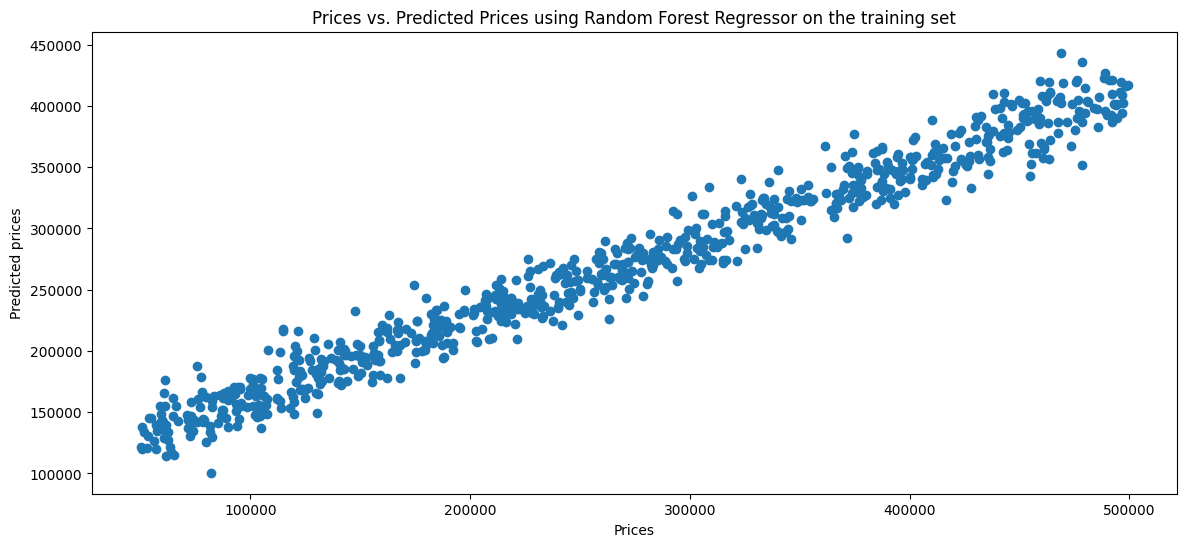

In [47]:
# Prediction Plot for Random Forest on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_random_forest)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Random Forest Regressor on the training set")
plt.show()

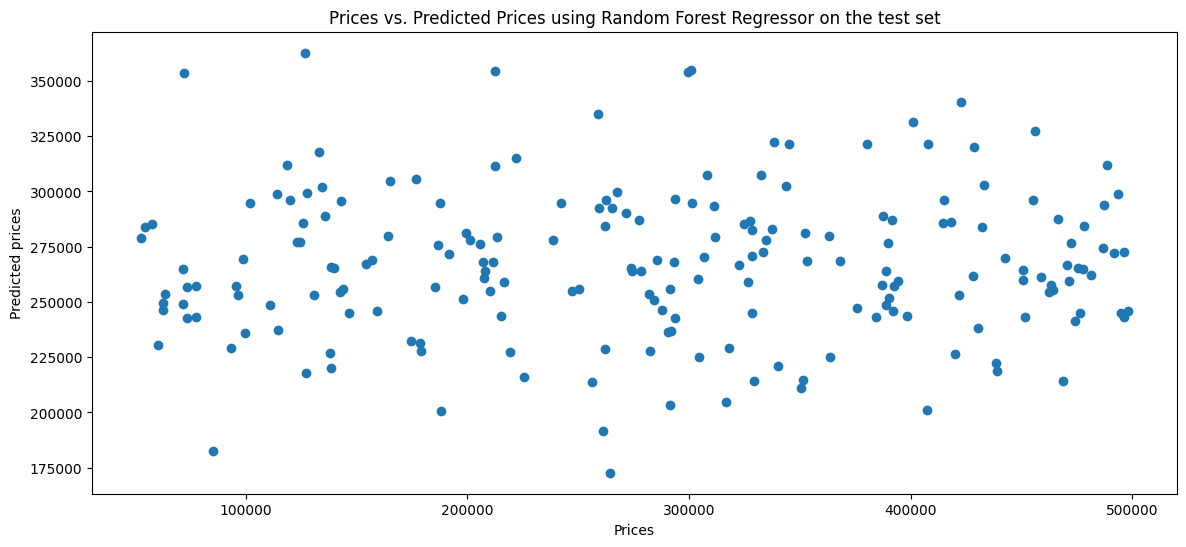

In [48]:
# Prediction Plot for Random Forest on the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_random_forest)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Random Forest Regressor on the test set")
plt.show()

In [49]:
# Cross-validation for Decison Tree Regression
Random_forest_scores = cross_val_score(random_forest_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Random_forest_rmse_scores = np.sqrt(-Random_forest_scores)

print("\nCross-Validation for Random Forest Regression:")
print("RMSE scores:", Random_forest_rmse_scores)
print("Mean RMSE:", Random_forest_rmse_scores.mean())
print("Standard Deviation:", Random_forest_rmse_scores.std())


Cross-Validation for Random Forest Regression:
RMSE scores: [134750.94473813 134339.14238876 143502.79363199 130940.67430579
 128833.34629378]
Mean RMSE: 134473.38027169072
Standard Deviation: 5018.2738503750215


#SVM Regressor


In [50]:
support_vector_regressor_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
support_vector_regressor_model .fit(X_train, y_train)

y_train_pred_support_vector_regressor = support_vector_regressor_model .predict(X_train)
y_pred_support_vector_regressor = support_vector_regressor_model .predict(X_test)
support_vector_regressor_mse = mean_squared_error(y_test, y_pred_support_vector_regressor)
support_vector_regressor_r2 = r2_score(y_test, y_pred_support_vector_regressor)

print("\nSupport Vector Regression Evaluation:")
print("Mean Squared Error:", support_vector_regressor_mse)
print("R-squared:", support_vector_regressor_r2)

Model_losses_mse['Support_Vector_Regression']=support_vector_regressor_mse
Model_losses_r2['Support_Vector_Regression']=support_vector_regressor_r2


Support Vector Regression Evaluation:
Mean Squared Error: 17184701886.887447
R-squared: -0.02420416681316606


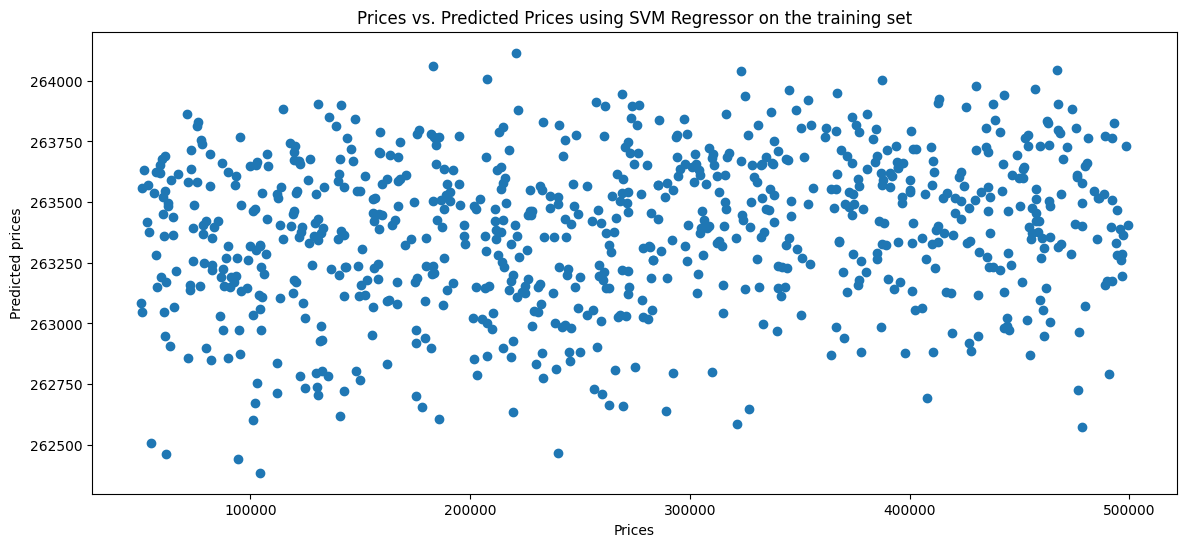

In [51]:
# Prediction Plot for SVM Regressor on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_support_vector_regressor)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using SVM Regressor on the training set")
plt.show()

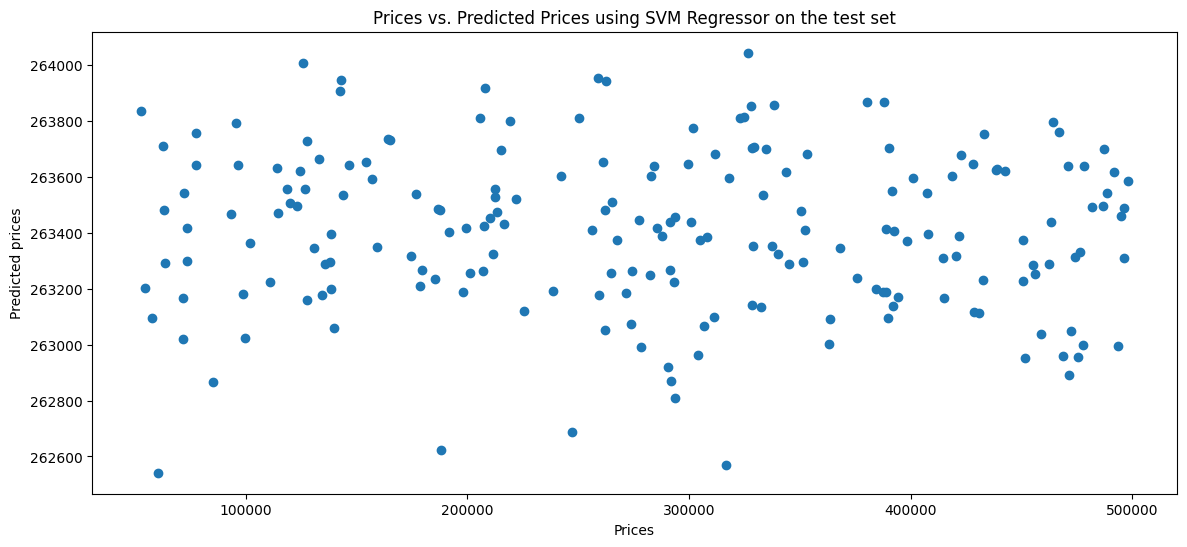

In [52]:
# Prediction Plot for SVM Regressor on the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_support_vector_regressor)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using SVM Regressor on the test set")
plt.show()

In [53]:
# Cross-validation for SVM Regression
support_vector_regressor_scores = cross_val_score(random_forest_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
support_vector_regressor_rmse_scores = np.sqrt(-support_vector_regressor_scores)

print("\nCross-Validation for Suport Vector Regression:")
print("RMSE scores:", support_vector_regressor_scores)
print("Mean RMSE:", support_vector_regressor_rmse_scores.mean())
print("Standard Deviation:", support_vector_regressor_rmse_scores.std())


Cross-Validation for Suport Vector Regression:
RMSE scores: [-1.83426929e+10 -1.83687335e+10 -2.08356945e+10 -1.69259409e+10
 -1.67060318e+10]
Mean RMSE: 134932.75901429023
Standard Deviation: 5382.309416183473


#Gradient Boosting Regressor

In [54]:
gradient_boosting_regressor_model = GradientBoostingRegressor(random_state=0)
gradient_boosting_regressor_model.fit(X_train, y_train)

y_train_pred_gradient_boosting_regressor = gradient_boosting_regressor_model .predict(X_train)
y_pred_gradient_boosting_regressor = gradient_boosting_regressor_model.predict(X_test)

gradient_boosting_regressor_mse = mean_squared_error(y_test, y_pred_gradient_boosting_regressor)
gradient_boosting_regressor_r2 = r2_score(y_test, y_pred_gradient_boosting_regressor)
print("\n Gradient Boosting Regression Evaluation:")
print("Mean Squared Error:", gradient_boosting_regressor_mse)
print("R-squared:", gradient_boosting_regressor_r2)

Model_losses_mse['Gradient_Boosting_Regression']=gradient_boosting_regressor_mse
Model_losses_r2['Gradient_Boosting_Regression']=gradient_boosting_regressor_r2


 Gradient Boosting Regression Evaluation:
Mean Squared Error: 17675234514.968258
R-squared: -0.05343979539404553


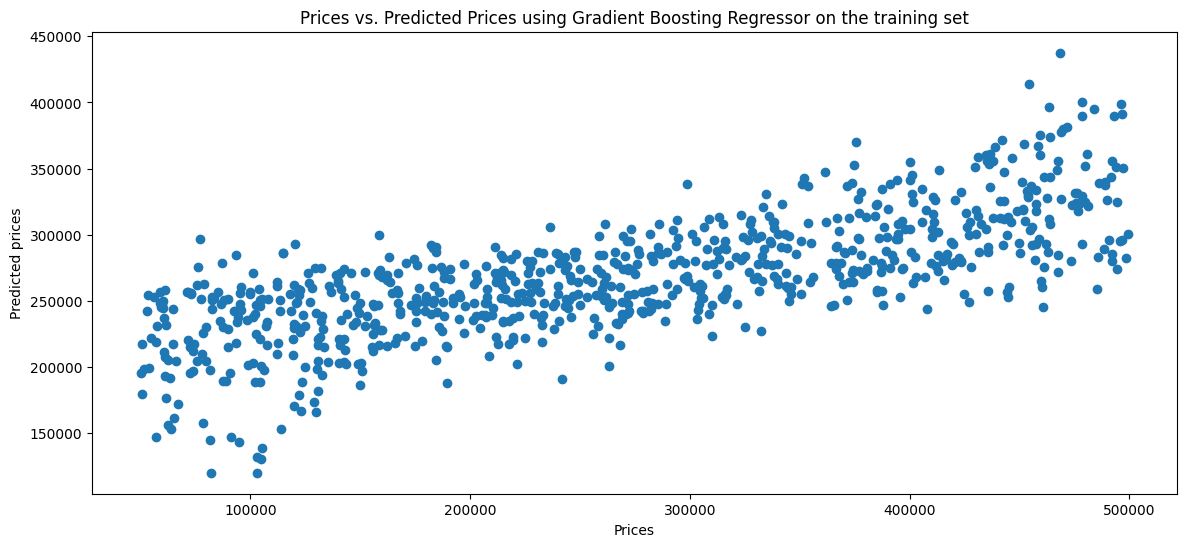

In [55]:
# Prediction Plot for Gradient Boostoing Regressor on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_gradient_boosting_regressor)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Gradient Boosting Regressor on the training set")
plt.show()

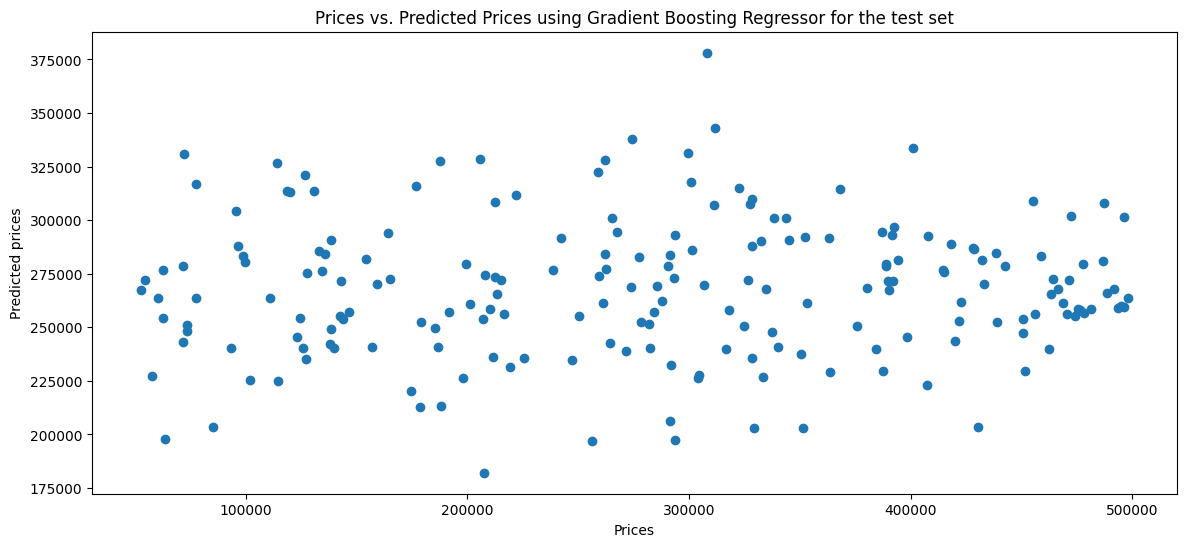

In [56]:
# Prediction Plot for Gradient Boostoing Regressor for the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_gradient_boosting_regressor)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Gradient Boosting Regressor for the test set")
plt.show()

In [57]:
# Cross-validation for Gradient Boosting Regression
gradient_boosting_scores = cross_val_score(gradient_boosting_regressor_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
gradient_boosting_rmse_scores = np.sqrt(-gradient_boosting_scores)

print("\nCross-Validation for Suport Vector Regression:")
print("RMSE scores:", gradient_boosting_rmse_scores)
print("Mean RMSE:", gradient_boosting_rmse_scores.mean())
print("Standard Deviation:", gradient_boosting_rmse_scores.std())


Cross-Validation for Suport Vector Regression:
RMSE scores: [135989.96506225 131751.43853864 142292.56971471 131396.61153162
 131292.15850999]
Mean RMSE: 134544.5486714423
Standard Deviation: 4252.295211819515


#XG Boost Regressor


In [58]:
xg_boost_regressor_model = xgb.XGBRegressor(seed=0)
xg_boost_regressor_model.fit(X_train, y_train)

y_train_pred_xg_boost = xg_boost_regressor_model.predict(X_train)
y_pred_xg_boost = xg_boost_regressor_model.predict(X_test)

xg_boost_mse = mean_squared_error(y_test, y_pred_xg_boost)
xg_boost_r2 = r2_score(y_test, y_pred_xg_boost)

print("\n xg Boost Regression Evaluation:")
print("Mean Squared Error:", xg_boost_mse)
print("R-squared:", xg_boost_r2)

Model_losses_mse['xg_Boost_Regression']=xg_boost_mse
Model_losses_r2['xg_Boost_Regression']=xg_boost_r2


 xg Boost Regression Evaluation:
Mean Squared Error: 22599503293.27509
R-squared: -0.34692504957225


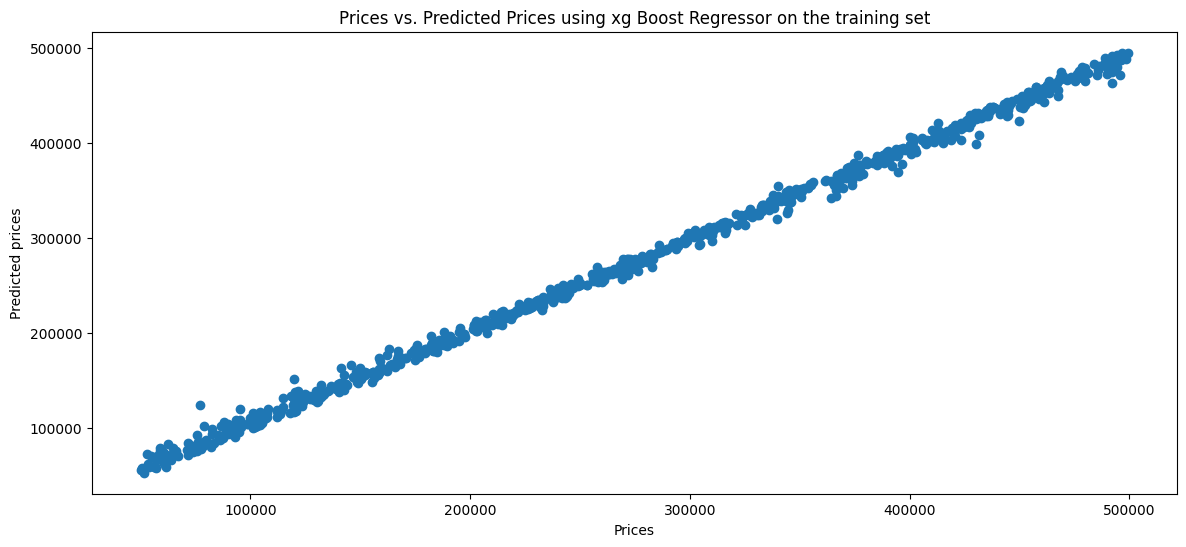

In [59]:
# Prediction Plot for xg Boost Regressor on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_xg_boost)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using xg Boost Regressor on the training set")
plt.show()

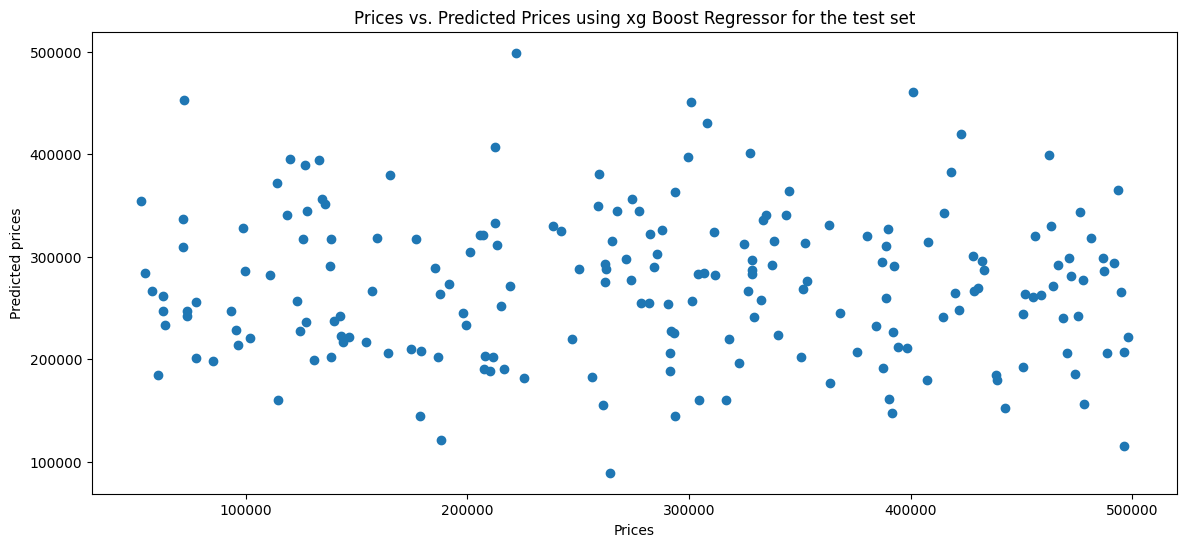

In [60]:
# Prediction Plot for xg Boost Regressor for the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_xg_boost)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using xg Boost Regressor for the test set")
plt.show()

In [61]:
# Cross-validation for XG Boost Regression
xg_boost_scores = cross_val_score(xg_boost_regressor_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
xg_boost_rmse_scores = np.sqrt(-xg_boost_scores)

print("\nCross-Validation for XG Boost Regression:")
print("RMSE scores:", xg_boost_rmse_scores)
print("Mean RMSE:", xg_boost_rmse_scores.mean())
print("Standard Deviation:", xg_boost_rmse_scores.std())


Cross-Validation for XG Boost Regression:
RMSE scores: [146922.05333453 146724.23645541 159075.02833079 146801.9561761
 145483.22968118]
Mean RMSE: 149001.30079560328
Standard Deviation: 5063.639394514461


#Lasso Regression


In [62]:
lasso_regression_model = Lasso(alpha=0.5, max_iter=100000)
lasso_regression_model.fit(X_train,y_train)

y_train_pred_lasso=lasso_regression_model.predict(X_train)
y_pred_lasso=lasso_regression_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\n Lasso Regression Evaluation:")
print("Mean Squared Error:", lasso_mse)
print("R-squared:", lasso_r2)

Model_losses_mse['Lasso_Regression']=lasso_mse
Model_losses_r2['Lasso_Regression']=lasso_r2


 Lasso Regression Evaluation:
Mean Squared Error: 17230555087.52188
R-squared: -0.026937006722791867


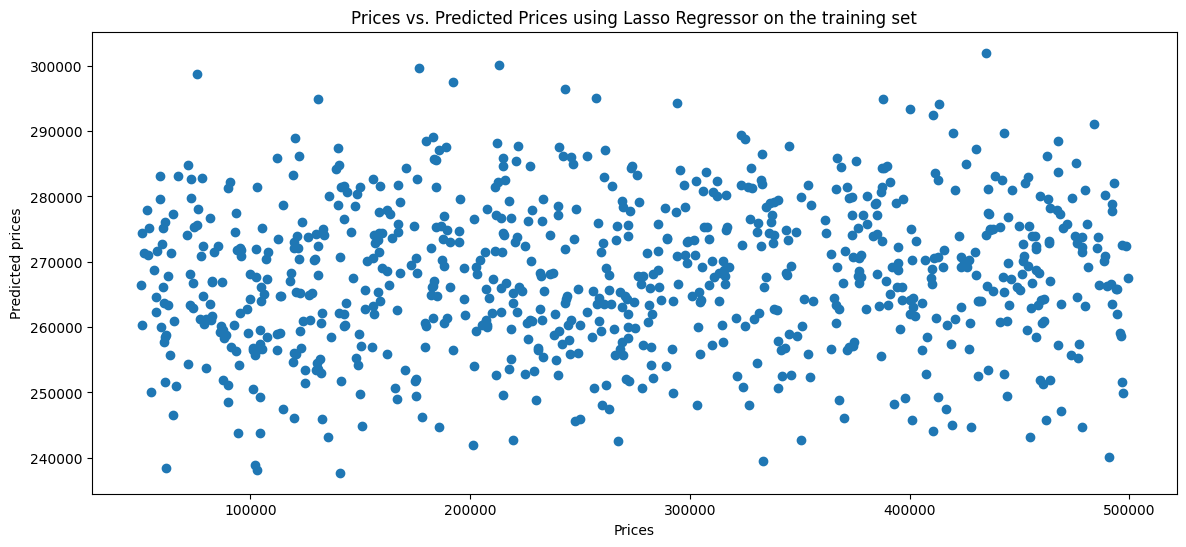

In [63]:
# Prediction Plot for Lasso Regressor on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_lasso)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Lasso Regressor on the training set")
plt.show()

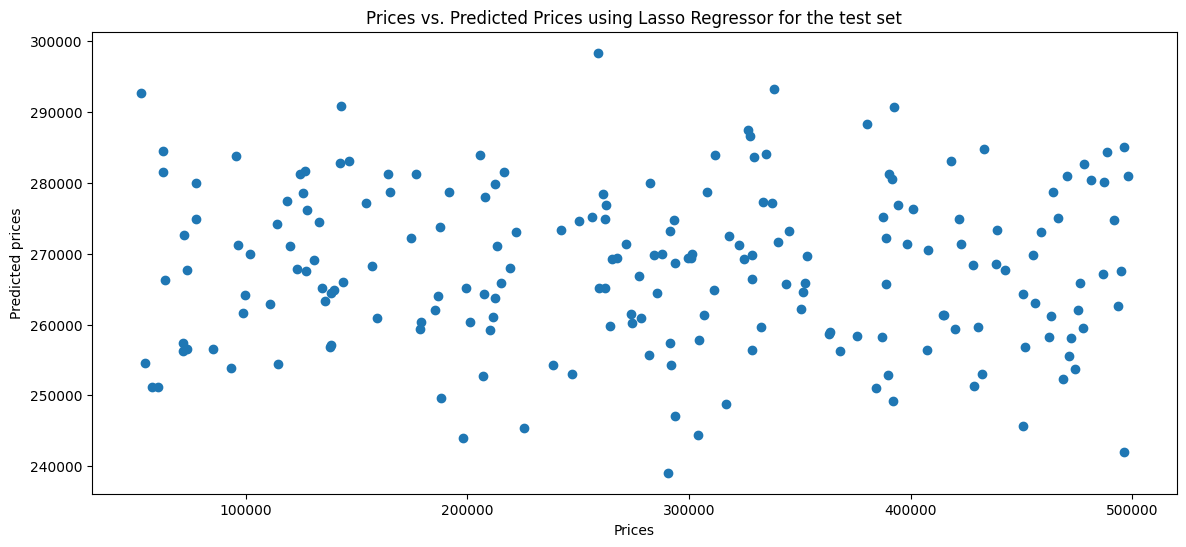

In [64]:
# Prediction Plot for Lasso Regressor for the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Lasso Regressor for the test set")
plt.show()

In [65]:
# Cross-validation for Lasso Regression
lasso_scores = cross_val_score(lasso_regression_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lasso_rmse_scores = np.sqrt(-lasso_scores)

print("\nCross-Validation for XG Boost Regression:")
print("RMSE scores:", lasso_rmse_scores)
print("Mean RMSE:", lasso_rmse_scores.mean())
print("Standard Deviation:", lasso_rmse_scores.std())


Cross-Validation for XG Boost Regression:
RMSE scores: [130723.05075547 128738.21618806 142700.00734184 124736.27070543
 123006.73232397]
Mean RMSE: 129980.85546295447
Standard Deviation: 6928.43263046744


#Ridge Regression


In [66]:
ridge_regression_model = Ridge(alpha=0.1)
ridge_regression_model.fit(X_train,y_train)

y_train_pred_ridge=ridge_regression_model.predict(X_train)
y_pred_ridge=ridge_regression_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\n Ridge Regression Evaluation:")
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)

Model_losses_mse['Ridge_Regression']=ridge_mse
Model_losses_r2['Ridge_Regression']=ridge_r2


 Ridge Regression Evaluation:
Mean Squared Error: 17230552937.890823
R-squared: -0.026936878605289483


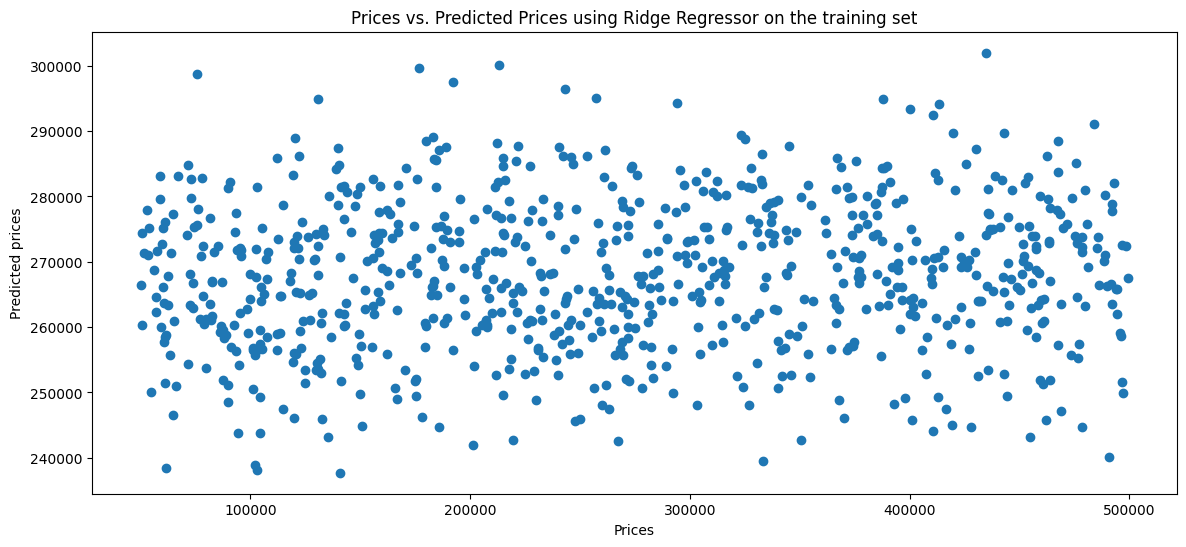

In [67]:
# Prediction Plot for Ridge Regressor on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_ridge)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Ridge Regressor on the training set")
plt.show()


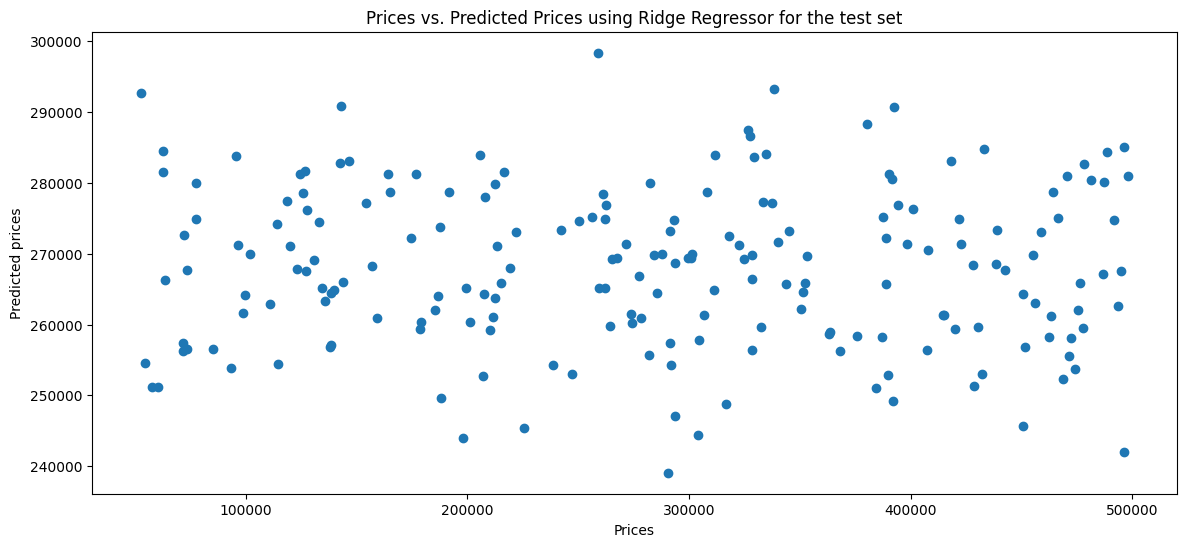

In [68]:
# Prediction Plot for Ridge Regressor for the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Ridge Regressor for the test set")
plt.show()


In [69]:
# Cross-validation for Lasso Regression
ridge_scores = cross_val_score(ridge_regression_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_rmse_scores = np.sqrt(-ridge_scores)

print("\nCross-Validation for Ridge Regression:")
print("RMSE scores:", ridge_rmse_scores)
print("Mean RMSE:", ridge_rmse_scores.mean())
print("Standard Deviation:", ridge_rmse_scores.std())


Cross-Validation for Ridge Regression:
RMSE scores: [130723.02518291 128738.08651615 142699.79488261 124736.25819138
 123006.62716879]
Mean RMSE: 129980.75838836856
Standard Deviation: 6928.3817923399865


#Elastic Net Regression

In [70]:
ElasticNet_regressor_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
ElasticNet_regressor_model.fit(X_train,y_train)

y_train_pred_ElasticNet_regressor=ElasticNet_regressor_model.predict(X_train)
y_pred_ElasticNet_regressor=ElasticNet_regressor_model.predict(X_test)
ElasticNet_mse = mean_squared_error(y_test, y_pred_ElasticNet_regressor)
ElasticNet_r2 = r2_score(y_test, y_pred_ElasticNet_regressor)


print("\nElastic Net Regression Evaluation:")
print("Mean Squared Error:", ElasticNet_mse)
print("R-squared:", ElasticNet_r2)

Model_losses_mse['ElasticNet_Regression']=ElasticNet_mse
Model_losses_r2['ElasticNet_Regression']=ElasticNet_r2


Elastic Net Regression Evaluation:
Mean Squared Error: 17217556809.76166
R-squared: -0.026162312443482216


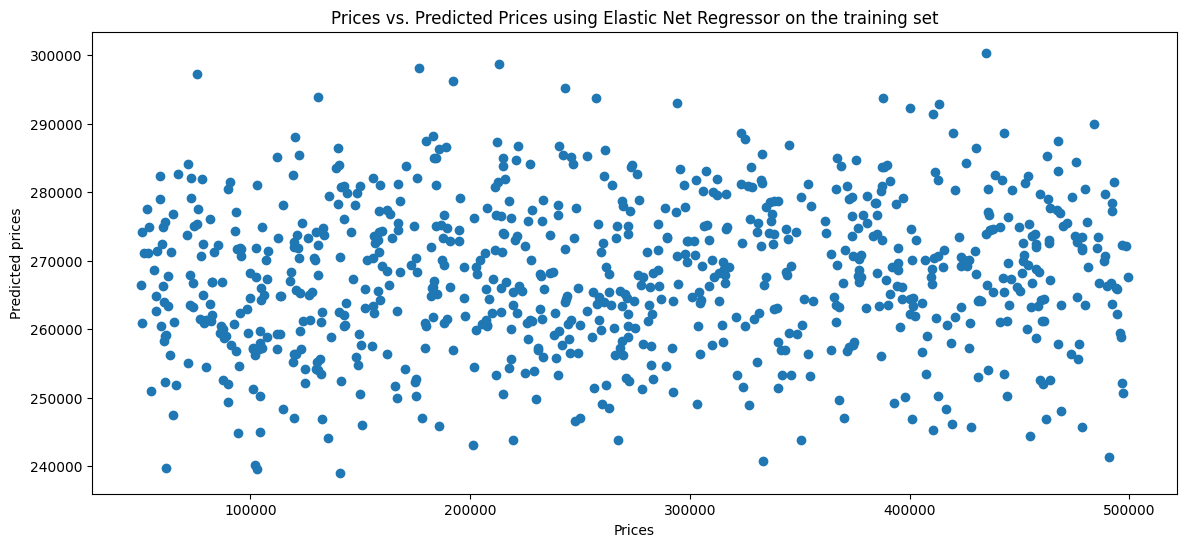

In [71]:
# Prediction Plot for Elastic Net Regressor on the training set
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred_ElasticNet_regressor)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Elastic Net Regressor on the training set")
plt.show()


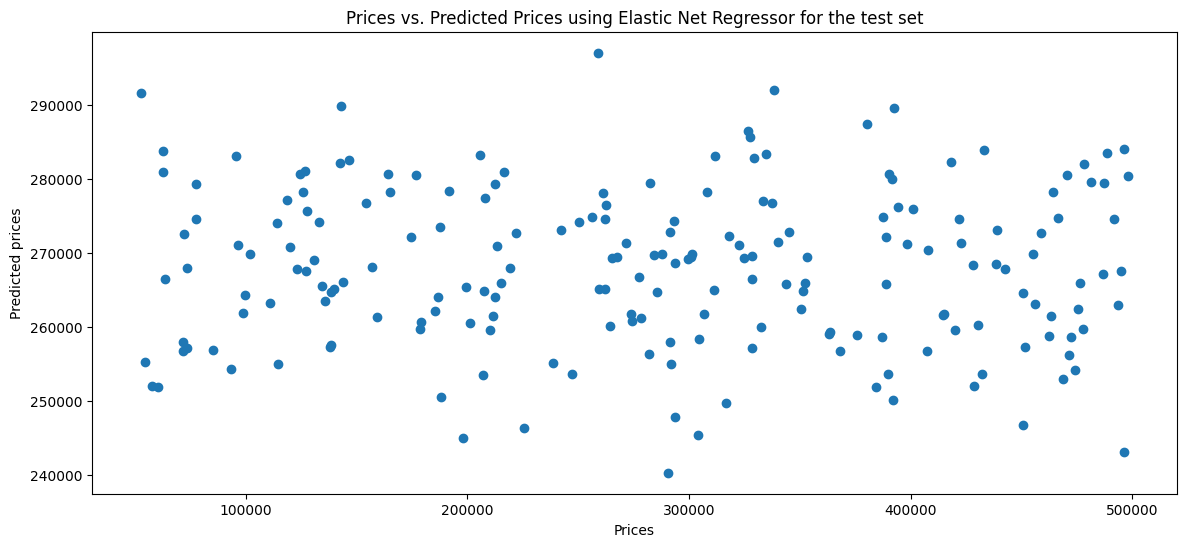

In [72]:
# Prediction Plot for Elastic Net Regressor for the test set
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_ElasticNet_regressor)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices using Elastic Net Regressor for the test set")
plt.show()


In [73]:
# Cross-validation for ElasticNet Regression
elastic_net_scores = cross_val_score(ElasticNet_regressor_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)

print("\nCross-Validation for Elastic Net Regression:")
print("RMSE scores:", elastic_net_rmse_scores)
print("Mean RMSE:", elastic_net_rmse_scores.mean())
print("Standard Deviation:", elastic_net_rmse_scores.std())


Cross-Validation for Elastic Net Regression:
RMSE scores: [130698.32976496 128646.51832898 142566.78370834 124722.05330634
 122968.93699581]
Mean RMSE: 129920.52442088746
Standard Deviation: 6892.091356013635


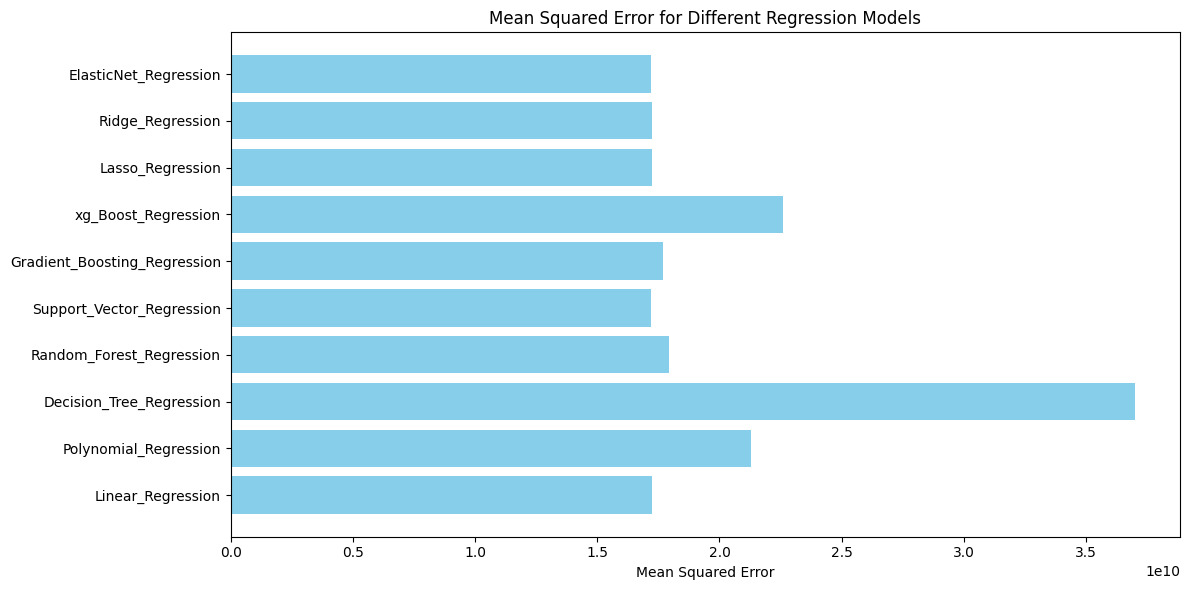

In [74]:
# Extract names and values
model_names = list(Model_losses_mse.keys())
mse_loss_values = list(Model_losses_mse.values())

plt.figure(figsize=(12, 6))
plt.barh(model_names, mse_loss_values, color='skyblue')

# Add labels and title
plt.xlabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Regression Models')

# Show the plot
plt.tight_layout()
plt.show()

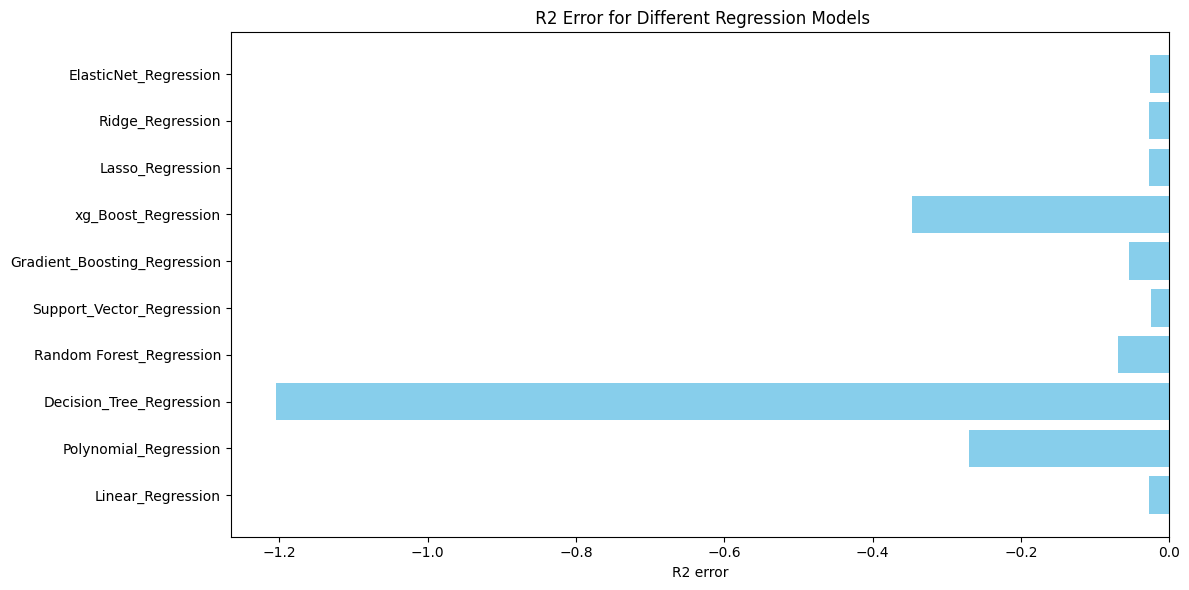

In [75]:

# Extract names and values
model_names = list(Model_losses_r2.keys())
r2_values = list(Model_losses_r2.values())

plt.figure(figsize=(12, 6))
plt.barh(model_names, r2_values, color='skyblue')

# Add labels and title
plt.xlabel('R2 error')
plt.title(' R2 Error for Different Regression Models')

# Show the plot
plt.tight_layout()
plt.show()

#Infrences:

Generally, the models with complex learning objctive for e.g: xg Boost tend to perform better that simpler models such as linear regression. However in this case we find the right opposite, The linear regression model perfoms the best among the other models whereas XG Boost has the highest MSE loss.

This could be due to the following factors:

1) The association between the data is simpler hence more complex models overfit.

2) The size of training data is only 800 records, which is quite less. This could be another reason behind such results.

3) WE oberve that Decison tree performs the worst but Random forest performs better. This is another example where ensamble technique improves the performance.

4) The same trend of MSE is reflected in R-squared loss.

5) Looking at the individual plots for the predicted values of the training and testing data, we can conclude the following:

  5A)Models like Decision Tree Regressor and xg Boost seem to overfit as they perform well on the train set data when the prediction is made but the same on test set is quite poor.


  5B) Models like Support Vector Regression, Lasso Regression, Ridge Regression and Elastic Net Regression seem to underfit as we see that for the predicted values of train set too, there is a huge variance between the actual training points and the predicted traning points. This imples that the learning for aforementined models were poor.  

#Scope of Improvemement :

1) Since the data is less, increasing the training data should help us overcome overfitting.

2) Hyperparameter tuning can help us improve the accuracies further.

3) Sticking to simpler architecures due to lack of training data is another solution that can be implemented.

4) We can try doing feature selection, in an itterative manner to understand if by eleminating some features model accuracy can be improved further.

5) For the underfitting models we can try running it for more itterations to see if that helps the model learn.